In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\Godbl\\Downloads\\Data-Collisions.csv")
df.head(10)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.shape

(194673, 38)

In [4]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [7]:
# Data Understanding
#Data is not ready for analysis. we have to drop few columns and select few for analysis.Half of  features are of type object, when they should be numerical type.
#we have to convert into either dummy varaibles or label encoder.selecting four features for data analysis.

In [8]:
# analysing target variable
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

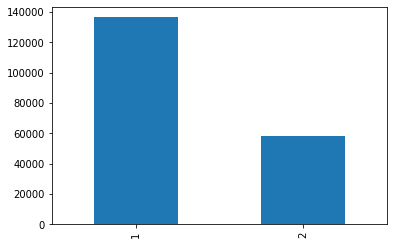

In [9]:
df['SEVERITYCODE'].value_counts().plot(kind='bar')

In [10]:
# down sampling 
from sklearn.utils import resample

df_maj=df[df.SEVERITYCODE==1]
df_min=df[df.SEVERITYCODE==2]

df_maj_dsample=resample(df_maj,
                        replace=False, # sample withot replacement
                        n_samples=58188, # to match minority class
                     random_state=123) # reproducible results

df_dsample = pd.concat([df_maj_dsample, df_min])

df_dsample.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [11]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

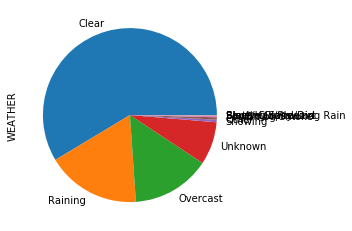

In [13]:
df['WEATHER'].value_counts().plot(kind='pie')

In [13]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

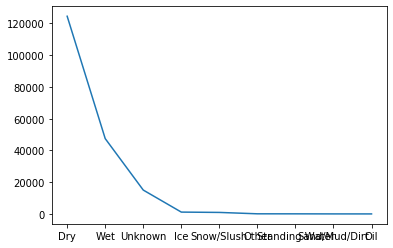

In [14]:
df['ROADCOND'].value_counts().plot(kind='line')

In [15]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

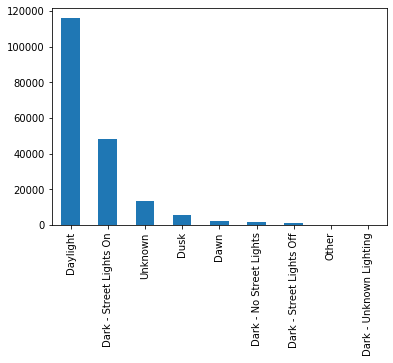

In [16]:
df['LIGHTCOND'].value_counts().plot(kind='bar')

In [17]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [18]:
# FEATURE SELECTION
#SELECTING 3 FEATURES FOR DATA ANALYSING
cat_num=["WEATHER","ROADCOND","LIGHTCOND"]


In [19]:
# CONVERTING FETAURES INTO OBJECT TYPE
df[cat_num]=df[cat_num].astype(object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [21]:
##Replacing NULL with nan so we will able to put np.nan function 
df.replace("NULL",np.nan,inplace=True)

In [22]:
df[cat_num]


,WEATHER,ROADCOND,LIGHTCOND
0,Overcast,Wet,Daylight
1,Raining,Wet,Dark - Street Lights On
2,Overcast,Dry,Daylight
3,Clear,Dry,Daylight
4,Raining,Wet,Daylight
...,...,...,...
194668,Clear,Dry,Daylight
194669,Raining,Wet,Daylight
194670,Clear,Dry,Daylight
194671,Clear,Dry,Dusk


In [23]:
##Replacing nan values of categorical variables with mode
for each in cat_num:
        df[each] = df[each].replace(np.nan,np.argmax(df[each].value_counts()))

In [24]:
df[cat_num]

,WEATHER,ROADCOND,LIGHTCOND
0,Overcast,Wet,Daylight
1,Raining,Wet,Dark - Street Lights On
2,Overcast,Dry,Daylight
3,Clear,Dry,Daylight
4,Raining,Wet,Daylight
...,...,...,...
194668,Clear,Dry,Daylight
194669,Raining,Wet,Daylight
194670,Clear,Dry,Daylight
194671,Clear,Dry,Dusk


In [25]:
##Checking null values for each variable
df[cat_num].isnull().sum()

WEATHER      0
ROADCOND     0
LIGHTCOND    0
dtype: int64

In [26]:
df[cat_num]
df.shape

(194673, 38)

# One Hot Coding

In [27]:
##Creating Dummy variables for all categorical variables 
#dummy.head()
data2=pd.get_dummies(df[cat_num], drop_first=True)
data2.head()

,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [28]:
X=data2
X[0:5]

,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [29]:
data3=pd.get_dummies(df["SEVERITYCODE"],drop_first=True)
data3

,2
0,1
1,0
2,0
3,0
4,1
...,...
194668,1
194669,0
194670,1
194671,1


In [31]:

Y=data3
Y[0:5]

,2
0,1
1,0
2,0
3,0
4,1


# Normalize data set

In [32]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.01696304, -1.15340914, -0.05414257, -0.06551471,  2.45445634,
        -0.00506801, -0.45298634, -0.011333  , -0.02409974, -0.06841713,
        -0.28988624, -1.33213439, -0.07905204, -0.01813462, -0.02604842,
        -0.01963186, -0.07200071, -0.02431221, -0.28975087,  1.76085874,
        -0.08920831, -0.07872239, -0.576075  , -0.00751719, -0.1141037 ,
         0.82233559, -0.17682024, -0.03476509, -0.27267986],
       [-0.01696304, -1.15340914, -0.05414257, -0.06551471, -0.4074222 ,
        -0.00506801,  2.2075721 , -0.011333  , -0.02409974, -0.06841713,
        -0.28988624, -1.33213439, -0.07905204, -0.01813462, -0.02604842,
        -0.01963186, -0.07200071, -0.02431221, -0.28975087,  1.76085874,
        -0.08920831, -0.07872239,  1.73588509, -0.00751719, -0.1141037 ,
        -1.21604855, -0.17682024, -0.03476509, -0.27267986],
       [-0.01696304, -1.15340914, -0.05414257, -0.06551471,  2.45445634,
        -0.00506801, -0.45298634, -0.011333  , -0.02409974, -0.06841713,
  

# Train/Test/Split

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)


Train set: (136271, 29) (136271, 1)
Test set: (58402, 29) (58402, 1)


# Modelling and Prediction

# K Nearset Neighbor(KNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
k =25
#Train the model and predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
neigh


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [35]:
# Train model and predict
y1= neigh.predict(X_test)
y1

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [36]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, y1))
print('Accuracy Score:', metrics.accuracy_score(Y_test,y1))

Train set Accuracy:  0.7000755846805263
Test set Accuracy:  0.7033149549672957
Accuracy Score: 0.7033149549672957


# DECISION TREE

In [37]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model_tree.fit(X_train,Y_train)
model_tree 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
# Train model and predict
y_pred = model_tree.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [39]:
#Accuracy
from sklearn import metrics
print("Train set Decission Tree Accuracy: ", metrics.accuracy_score(Y, model_tree.predict(X)))
print("Test set Decission Tree Accuracy: ", metrics.accuracy_score(Y_test, y_pred))
print('Accuracy Score:', metrics.accuracy_score(Y_test,y_pred))

Train set Decission Tree Accuracy:  0.7010987656223513
Test set Decission Tree Accuracy:  0.7034519365775145
Accuracy Score: 0.7034519365775145


# LOGISTIC REGRESSION

In [40]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(C=6, solver='liblinear')
model_lr.fit(X_train,Y_train)
model_lr

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# Train model and predict
LRyhat = model_lr.predict(X_test)
LRyhat

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [42]:
print("Train set Logistic regression Accuracy: ", metrics.accuracy_score(Y, model_lr.predict(X)))
print("Test set Logistic regression Accuracy: ", metrics.accuracy_score(Y_test, LRyhat))
print('Accuracy Score:', metrics.accuracy_score(Y_test,LRyhat))

Train set Logistic regression Accuracy:  0.7011039024415302
Test set Logistic regression Accuracy:  0.7034348138762371
Accuracy Score: 0.7034348138762371


# MODEL EVALUATION 

In [43]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [44]:
# KNN Evaluation
knn_jaccard = jaccard_similarity_score(Y_test, y1)
knn_f1_score = f1_score(Y_test, y1, average='macro')

In [45]:
# DECISION TREE
tree_jaccard = jaccard_similarity_score(Y_test,y_pred)
tree_f1_score = f1_score(Y_test, y_pred, average='macro')


In [46]:
#LOGISTIC REGRESSION
lr_jaccard = jaccard_similarity_score(Y_test,LRyhat)
lr_f1_score = f1_score(Y_test, LRyhat, average='macro')
lr_log_loss = log_loss(Y_test, LRyhat)

# The Final Report  Model Evauation

In [47]:
report = pd.DataFrame(data=np.array([["KNN", knn_jaccard, knn_f1_score, np.nan],
                                     ["Decision Tree", tree_jaccard, tree_f1_score, np.nan],
                                     ["LogisticRegression", lr_jaccard, lr_f1_score, lr_log_loss]]), columns=["Algorithm", "Jaccard", "F1-score", "LogLoss"])
report = report.set_index(["Algorithm", "Jaccard", "F1-score", "LogLoss"])
# Jaccard
report

,,,
Algorithm,Jaccard,F1-score,LogLoss
KNN,0.7033149549672957,0.41296547250467,nan
Decision Tree,0.7034519365775145,0.4129567271447957,nan
LogisticRegression,0.7034348138762371,0.41295082626351975,10.242998663734985
